# **Итоговое задание.**



## f(x) = -12x^4*sin(cos(x)) - 18x^3+5x^2 + 10x - 30

### 1. Определить корни

### 2. Найти интервалы, на которых функция возрастает

### 3. Найти интервалы, на которых функция убывает

### 4. Построить график

### 5. Вычислить вершину(ы)

### 6. Определить промежутки, на котором f > 0

### 7. Определить промежутки, на котором f < 0


In [13]:
from sympy import *
import sympy as sm
from sympy.plotting import plot
sm.init_printing()

## Для начала сделаем визуализацию графика функций

In [14]:
x = sm.Symbol('x')
f = -12*x**4*sin(cos(x))-18*x**3+5*x**2+10*x-30
f   

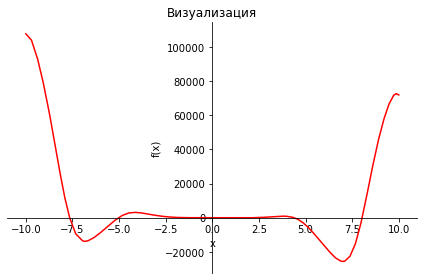

In [15]:
plot(f,line_color='red', title='Визуализация')

### Находим корни

In [7]:
#nsolve - возвращает ближайшее решение,чтобы определить периодичность, я построил график функции, 
#Для исследования возьмем лишь интервал от -13 до 13 по оси Х
interval = (-13,13)
dic = []
for i in range(interval[0],interval[1]): 
    try:
        d = sm.nsolve(f,x,i)     
        if d not in dic:
            dic.append(d)      
    except:
        pass
dic.sort()
#проверка выхода за границы интервала
if dic[0] < interval[0]:
    dic.pop(0)
if dic[-1] > interval[1]:
    dic.pop(-1)
print(f"Корни уравнения на интервале {interval}: {dic}")

Корни уравнения на интервале (-13, 13): [-11.1337690610358, -7.65062228513275, -5.02686592820621, -1.33896663927711, 2.27305684575625, 4.38352369796896, 8.03516413341352, 10.8606499895942]


## В начал неоходимо выяснить  точки  max и min. Для этого нам потребуется найти производную f'(x) от функции f(x) и приравнять ее к 0. Точки экстремумы являются вершинами нашей функции.

In [16]:
deriv_f = sm.diff(f,x)
print(f"Производная функции: {deriv_f}")
dic_deriv_f = []
for i in range(interval[0],interval[1]):
    try:
        d = sm.nsolve(deriv_f,x,i)
        if d not in dic_deriv_f:
            dic_deriv_f.append(d)      
    except:
        pass
dic_deriv_f.sort()
print(f"Вершины функции (экстремумы) на интервале {interval}: {dic_deriv_f}")
#Добавляем начало и конец интевала в список решений
dic_deriv_f.insert(0,interval[0])
dic_deriv_f.append(interval[1])

Производная функции: 12*x**4*sin(x)*cos(cos(x)) - 48*x**3*sin(cos(x)) - 54*x**2 + 10*x + 10
Вершины функции (экстремумы) на интервале (-13, 13): [-12.9438052089824, -9.97895376101509, -6.83137004000085, -4.16778352385048, -0.392677179932750, 0.454573568108782, 1.70060727795121, 3.81931083338228, 7.00103165854095, 9.87714905397232, 13.0123448285001]


## Вычислим интервалы, на которых функция возрастает

In [17]:
f_increasing = []
for i in range(len(dic_deriv_f)-1):
    if (deriv_f.subs(x,((dic_deriv_f[i+1] + dic_deriv_f[i])/2))) > 0:
        f_increasing.append((dic_deriv_f[i],dic_deriv_f[i+1]))

print(f"В диапазоне {interval} функция возрастает на интервалах: {f_increasing} ")

В диапазоне (-13, 13) функция возрастает на интервалах: [(-12.9438052089824, -9.97895376101509), (-6.83137004000085, -4.16778352385048), (-0.392677179932750, 0.454573568108782), (1.70060727795121, 3.81931083338228), (7.00103165854095, 9.87714905397232)] 


## Вычислим интервалы, на которых функция убывает

In [18]:
f_decreasing = []
for i in range(len(dic_deriv_f)-1):
    if (deriv_f.subs(x,((dic_deriv_f[i+1] + dic_deriv_f[i])/2))) < 0:
        f_decreasing.append((dic_deriv_f[i],dic_deriv_f[i+1]))

print(f"В диапазоне {interval} функция убывает на интервалах: {f_decreasing} ")

В диапазоне (-13, 13) функция убывает на интервалах: [(-13, -12.9438052089824), (-9.97895376101509, -6.83137004000085), (-4.16778352385048, -0.392677179932750), (0.454573568108782, 1.70060727795121), (3.81931083338228, 7.00103165854095), (9.87714905397232, 13.0123448285001), (13.0123448285001, 13)] 


## Определим интервалы, на которых f(х) > 0

In [19]:
value_interval = dic
if value_interval[0] > interval[0]:
    value_interval.insert(0,interval[0])
if value_interval[-1] < interval[1]:
    value_interval.append(interval[1])
interval_up_zero = []

for i in range(len(value_interval)-1):
    if (f.subs(x,((value_interval[i+1] + value_interval[i])/2))) > 0:
        interval_up_zero.append((value_interval[i],value_interval[i+1]))

print(f"В диапазоне {interval} функция больше нуля на промежутках: {interval_up_zero} ")

В диапазоне (-13, 13) функция больше нуля на промежутках: [(-11.1337690610358, -7.65062228513275), (-5.02686592820621, -1.33896663927711), (2.27305684575625, 4.38352369796896), (8.03516413341352, 10.8606499895942)] 


## Определим интервалы, на которых f(х) < 0

In [12]:
interval_low_zero = []
for i in range(len(value_interval)-1):
    if (f.subs(x,((value_interval[i+1] + value_interval[i])/2))) < 0:
        interval_low_zero.append((value_interval[i],value_interval[i+1]))

print(f"В диапазоне {interval} функция меньше нуля на промежутках: {interval_low_zero} ")

В диапазоне (-13, 13) функция меньше нуля на промежутках: [(-13, -11.1337690610358), (-7.65062228513275, -5.02686592820621), (-1.33896663927711, 2.27305684575625), (4.38352369796896, 8.03516413341352), (10.8606499895942, 13)] 
